In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
import sklearn.model_selection
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [2]:
valid_part = 0.3
pd.set_option('max_columns',100)

In [3]:
data = pd.read_csv('/Users/rupesh/Downloads/dmmlfinalproject/datasets/used cars/vehicles.csv')
data.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
data.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
drop_columns = ['id', 'county', 'url', 'region_url', 'title_status', 'VIN', 'size', 'image_url', 'description', 'lat','long']
data = data.drop(columns = drop_columns)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  state         426880 non-null  object 
 14  posting_date  426812 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [7]:
data = data.dropna()
data.shape

(115988, 15)

In [8]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115988 entries, 31 to 426878
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115988 non-null  int64  
 1   price         115988 non-null  int64  
 2   year          115988 non-null  float64
 3   manufacturer  115988 non-null  int64  
 4   model         115988 non-null  int64  
 5   condition     115988 non-null  int64  
 6   cylinders     115988 non-null  int64  
 7   fuel          115988 non-null  int64  
 8   odometer      115988 non-null  float64
 9   transmission  115988 non-null  int64  
 10  drive         115988 non-null  int64  
 11  type          115988 non-null  int64  
 12  paint_color   115988 non-null  int64  
 13  state         115988 non-null  int64  
 14  posting_date  115988 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 14.2 MB


In [10]:
data['year'] = (data['year']-1900).astype(int)
data['odometer'] = data['odometer'].astype(int)

In [11]:
data.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
31,16,15000,113,13,4669,0,5,2,128000,0,2,10,0,1,97449
32,16,27990,112,14,9159,2,6,2,68696,2,0,8,0,1,97211
33,16,34590,116,7,9285,2,5,2,29499,2,0,8,9,1,96404
34,16,35000,119,38,9982,0,5,2,43000,0,0,10,5,1,95879
35,16,29990,116,7,3014,2,5,2,17302,2,0,8,8,1,95188


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115988 entries, 31 to 426878
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   region        115988 non-null  int64
 1   price         115988 non-null  int64
 2   year          115988 non-null  int64
 3   manufacturer  115988 non-null  int64
 4   model         115988 non-null  int64
 5   condition     115988 non-null  int64
 6   cylinders     115988 non-null  int64
 7   fuel          115988 non-null  int64
 8   odometer      115988 non-null  int64
 9   transmission  115988 non-null  int64
 10  drive         115988 non-null  int64
 11  type          115988 non-null  int64
 12  paint_color   115988 non-null  int64
 13  state         115988 non-null  int64
 14  posting_date  115988 non-null  int64
dtypes: int64(15)
memory usage: 14.2 MB


In [13]:
data['price'].value_counts()

0        4352
4500     1216
6500     1184
3500     1181
5500     1106
         ... 
18373       1
15598       1
29987       1
6978        1
19693       1
Name: price, Length: 5227, dtype: int64

In [14]:
data['odometer'].value_counts()

200000    688
100000    651
150000    572
140000    493
160000    491
         ... 
83936       1
103403      1
152607      1
222881      1
69550       1
Name: odometer, Length: 37715, dtype: int64

In [15]:
data = data[data['price'] > 1000]
data = data[data['price'] < 40000]
# Rounded ['odometer'] to 5000
data['odometer'] = data['odometer'] // 5000
data = data[data['year'] > 110]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56375 entries, 31 to 426878
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   region        56375 non-null  int64
 1   price         56375 non-null  int64
 2   year          56375 non-null  int64
 3   manufacturer  56375 non-null  int64
 4   model         56375 non-null  int64
 5   condition     56375 non-null  int64
 6   cylinders     56375 non-null  int64
 7   fuel          56375 non-null  int64
 8   odometer      56375 non-null  int64
 9   transmission  56375 non-null  int64
 10  drive         56375 non-null  int64
 11  type          56375 non-null  int64
 12  paint_color   56375 non-null  int64
 13  state         56375 non-null  int64
 14  posting_date  56375 non-null  int64
dtypes: int64(15)
memory usage: 6.9 MB


In [17]:
data.corr()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
region,1.000000,-0.029750,-0.014931,0.017071,-0.001195,0.004352,-0.005627,0.001712,0.017909,-0.021106,0.015142,0.008324,-0.001706,-0.021164,-0.012376
price,-0.029750,1.000000,0.539426,-0.041006,0.064407,0.217319,0.552305,-0.026343,-0.478651,0.519122,-0.082443,0.032836,0.043522,-0.011337,-0.015851
year,-0.014931,0.539426,1.000000,0.034322,0.004630,0.194302,0.019298,0.095138,-0.544826,0.316121,0.024450,-0.007381,0.007870,-0.005911,-0.047645
manufacturer,0.017071,-0.041006,0.034322,1.000000,0.016683,-0.025980,-0.199616,-0.020221,-0.020799,-0.011618,-0.130419,0.020921,0.000219,-0.010798,0.014884
model,-0.001195,0.064407,0.004630,0.016683,1.000000,0.001186,0.090659,0.024650,0.021712,0.003938,-0.160182,-0.077372,-0.002893,0.020733,-0.011591
condition,0.004352,0.217319,0.194302,-0.025980,0.001186,1.000000,0.127702,0.064701,-0.182290,0.297111,0.064448,0.054421,0.006978,0.007585,0.010297
cylinders,-0.005627,0.552305,0.019298,-0.199616,0.090659,0.127702,1.000000,-0.031678,-0.030080,0.303639,-0.035085,0.059028,0.024373,0.020728,-0.005777
fuel,0.001712,-0.026343,0.095138,-0.020221,0.024650,0.064701,-0.031678,1.000000,-0.158695,0.142773,0.022329,-0.059393,-0.058948,-0.012965,0.017300
odometer,0.017909,-0.478651,-0.544826,-0.020799,0.021712,-0.182290,-0.030080,-0.158695,1.000000,-0.405236,-0.082711,0.030240,0.025884,0.016062,-0.002373
transmission,-0.021106,0.519122,0.316121,-0.011618,0.003938,0.297111,0.303639,0.142773,-0.405236,1.000000,0.045537,0.003546,-0.026332,0.007982,0.041107


In [18]:
data.describe()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
count,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000,56375.000000
mean,194.868878,19721.231486,114.757428,18.321951,5968.622918,1.210040,4.447432,1.997446,16.200426,0.392106,0.749712,6.092789,5.654368,23.946483,54242.127503
std,118.325005,10452.631767,2.562497,10.862908,3261.232310,1.175065,1.249259,0.482563,11.521545,0.771488,0.750639,4.045011,4.096857,14.898226,31313.841840
min,0.000000,1012.000000,111.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,85.000000,10896.500000,113.000000,10.000000,3273.000000,0.000000,3.000000,2.000000,7.000000,0.000000,0.000000,2.000000,1.000000,9.000000,27238.500000
50%,198.000000,17582.000000,115.000000,14.000000,5940.000000,2.000000,5.000000,2.000000,16.000000,0.000000,1.000000,8.000000,8.000000,23.000000,53977.000000
75%,290.000000,28590.000000,117.000000,28.000000,9090.000000,2.000000,5.000000,2.000000,23.000000,0.000000,1.000000,9.000000,10.000000,37.000000,80667.500000
max,402.000000,39999.000000,122.000000,40.000000,11522.000000,5.000000,7.000000,4.000000,469.000000,2.000000,2.000000,12.000000,11.000000,50.000000,110193.000000


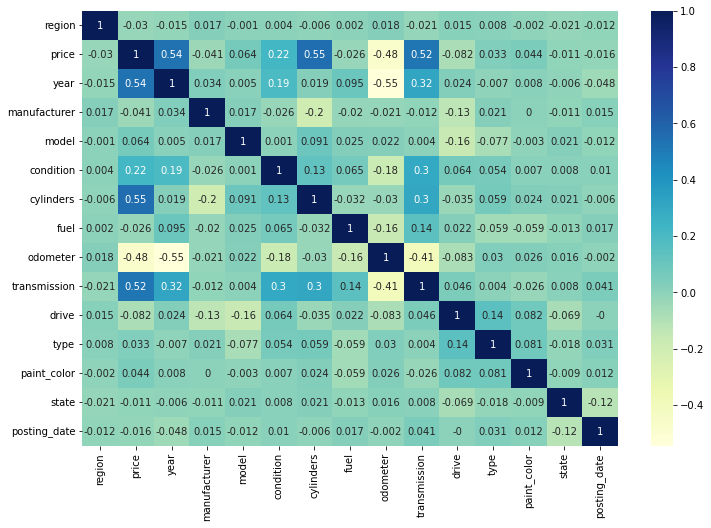

In [19]:
# heatmap to find correlation

plt.figure(figsize = (12,8))
sns.heatmap(np.round(data.corr(), 3), annot= True,  cmap= 'YlGnBu')
plt.show()

## Modelling

In [20]:
train_target0 = data['price']
data = data.drop(['price'], axis=1)

In [21]:
train0=data
# Synthesis test0 from train0
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [22]:
# For boosting model
train0b = train0
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [23]:
#For models from Sklearn
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [24]:
train0.head(3)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
0,0.954527,0.877598,-0.489636,-0.480030,0.666154,0.443572,0.00557,-0.195252,2.084640,-1.00143,-1.502714,-1.133484,-0.934235,-0.194408
1,0.236701,1.658647,-0.397565,0.970930,0.666154,1.243135,0.00557,-1.258224,2.084640,-1.00143,0.474455,-1.133484,-1.538006,-0.818024
2,1.342997,0.096549,0.154855,0.764527,-1.034777,-1.155555,0.00557,-0.460995,-0.507938,0.33117,-1.502714,1.060890,-1.001320,0.690896


In [25]:
len(train0)

45100

In [26]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [27]:
train.head(3)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
39031,-0.193995,1.268122,-0.765846,-0.997113,0.666154,1.243135,0.00557,-1.346805,2.084640,1.663771,0.721601,-1.377304,1.212508,0.049907
14763,-0.278445,0.096549,-0.489636,-0.431879,-1.034777,0.443572,0.00557,1.487789,-0.507938,-1.001430,0.968747,-1.377304,0.004965,0.642968
37412,1.528788,-0.684500,0.246926,0.777408,0.666154,-1.155555,0.00557,0.424816,-0.507938,0.331170,0.721601,-1.377304,-1.336749,-0.991182


In [28]:
test.head(3)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
44176,-1.545197,-0.684500,1.812118,0.616088,0.666154,-1.155555,2.064805,0.956302,-0.507938,0.331170,-0.514130,-0.158207,0.206222,-1.648041
36236,-0.776700,-1.465550,-1.042056,1.013561,0.666154,1.243135,0.005570,0.513397,-0.507938,-1.001430,-1.502714,-0.402026,-0.062120,1.028348
7672,0.616726,-1.075025,-1.042056,1.265661,-1.034777,1.243135,0.005570,1.399208,-0.507938,1.663771,-1.502714,1.060890,-1.403834,1.228318


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31570 entries, 39031 to 2732
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        31570 non-null  float64
 1   year          31570 non-null  float64
 2   manufacturer  31570 non-null  float64
 3   model         31570 non-null  float64
 4   condition     31570 non-null  float64
 5   cylinders     31570 non-null  float64
 6   fuel          31570 non-null  float64
 7   odometer      31570 non-null  float64
 8   transmission  31570 non-null  float64
 9   drive         31570 non-null  float64
 10  type          31570 non-null  float64
 11  paint_color   31570 non-null  float64
 12  state         31570 non-null  float64
 13  posting_date  31570 non-null  float64
dtypes: float64(14)
memory usage: 3.6 MB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13530 entries, 44176 to 38438
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        13530 non-null  float64
 1   year          13530 non-null  float64
 2   manufacturer  13530 non-null  float64
 3   model         13530 non-null  float64
 4   condition     13530 non-null  float64
 5   cylinders     13530 non-null  float64
 6   fuel          13530 non-null  float64
 7   odometer      13530 non-null  float64
 8   transmission  13530 non-null  float64
 9   drive         13530 non-null  float64
 10  type          13530 non-null  float64
 11  paint_color   13530 non-null  float64
 12  state         13530 non-null  float64
 13  posting_date  13530 non-null  float64
dtypes: float64(14)
memory usage: 1.5 MB


In [31]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [32]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5


In [33]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [34]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [35]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [36590 29950  4500 38900  5950]
ytrain =  [35222.6547322  18044.88672094  9019.02257109 32867.37652519
  6813.77235728]
acc(r2_score) for train = 67.75
acc(relative error) for train = 22.25
acc(rmse) for train = 593312.04
target_test = [ 5200 18400 12950 30990  6995]
ytest = [ 6111.47585292 18775.73057686 15856.74797801 32984.72114474
  7982.57139572]
acc(r2_score) for test = 67.28
acc(relative error) for test = 22.6
acc(rmse) for test = 599540.71


In [36]:
# Random Forest

random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(6,random_forest,train,test)

target =  [36590 29950  4500 38900  5950]
ytrain =  [36512.   29679.02  5858.13 38551.    6559.18]
acc(r2_score) for train = 98.7
acc(relative error) for train = 3.58
acc(rmse) for train = 119302.66
target_test = [ 5200 18400 12950 30990  6995]
ytest = [ 8746.17 18542.62 15897.02 30990.    6808.45]
acc(r2_score) for test = 90.64
acc(relative error) for test = 9.64
acc(rmse) for test = 320658.63


In [37]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(10,ridge,train,test)

target =  [36590 29950  4500 38900  5950]
ytrain =  [35220.143116   18043.9734195   9022.25587578 32863.39179131
  6816.12914876]
acc(r2_score) for train = 67.75
acc(relative error) for train = 22.25
acc(rmse) for train = 593312.08
target_test = [ 5200 18400 12950 30990  6995]
ytest = [ 6115.23131154 18775.72338778 15856.55925658 32982.65985009
  7986.50365119]
acc(r2_score) for test = 67.28
acc(relative error) for test = 22.6
acc(rmse) for test = 599538.41


In [38]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(11,bagging,train,test)

target =  [36590 29950  4500 38900  5950]
ytrain =  [36590.  30249.9  6168.3 38608.7  6614.9]
acc(r2_score) for train = 98.03
acc(relative error) for train = 4.2
acc(rmse) for train = 146554.83
target_test = [ 5200 18400 12950 30990  6995]
ytest = [ 8171.4 18348.1 16108.1 30990.   7735.9]
acc(r2_score) for test = 89.49
acc(relative error) for test = 10.34
acc(rmse) for test = 339839.17


In [39]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(13,Ada_Boost,train,test)

target =  [36590 29950  4500 38900  5950]
ytrain =  [31268.53716418 21917.57312391 12004.00762261 28803.26089288
 15666.98966781]
acc(r2_score) for train = 62.52
acc(relative error) for train = 27.12
acc(rmse) for train = 639635.28
target_test = [ 5200 18400 12950 30990  6995]
ytest = [12264.26795284 20186.48339786 17166.07999019 29538.28815023
 11806.79964899]
acc(r2_score) for test = 62.39
acc(relative error) for test = 27.6
acc(rmse) for test = 642771.37


In [40]:
# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(4,sgd,train,test)

target =  [36590 29950  4500 38900  5950]
ytrain =  [35319.9598736  18394.34325922  8927.65694019 32841.95645114
  6758.42482495]
acc(r2_score) for train = 67.67
acc(relative error) for train = 22.32
acc(rmse) for train = 594119.67
target_test = [ 5200 18400 12950 30990  6995]
ytest = [ 6363.15070422 18639.64508427 15527.62133561 33322.28742563
  8184.24370218]
acc(r2_score) for test = 67.23
acc(relative error) for test = 22.69
acc(rmse) for test = 599947.87


In [41]:
# Voting Regressor

Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(14,Voting_Reg,train,test)

target =  [36590 29950  4500 38900  5950]
ytrain =  [35109.68324358 18064.44071655  9038.32377176 32634.48202211
  6933.05995055]
acc(r2_score) for train = 67.74
acc(relative error) for train = 22.25
acc(rmse) for train = 593398.71
target_test = [ 5200 18400 12950 30990  6995]
ytest = [ 6131.64345351 18886.80884777 15870.68701526 32956.9372348
  8022.10208364]
acc(r2_score) for test = 67.29
acc(relative error) for test = 22.6
acc(rmse) for test = 599391.01


In [42]:
a = {
    'Model': ['Linear Regression', 'Random Forest','RidgeRegressor', 'BaggingRegressor', 
            'AdaBoostRegressor', 'Stochastic Gradient Descent', 'Voting Regressor'],
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
    }
models = pd.DataFrame.from_dict(a, orient='index')
models

,0,1,2,3,4,5,6
Model,Linear Regression,Random Forest,RidgeRegressor,BaggingRegressor,AdaBoostRegressor,Stochastic Gradient Descent,Voting Regressor
r2_train,67.75,98.7,67.75,98.03,67.67,62.52,67.74
r2_test,67.28,90.64,67.28,89.49,67.23,62.39,67.29
d_train,22.25,3.58,22.25,4.2,22.32,27.12,22.25
d_test,22.6,9.64,22.6,10.34,22.69,27.6,22.6
rmse_train,593312.04,119302.66,593312.08,146554.83,594119.67,639635.28,593398.71
rmse_test,599540.71,320658.63,599538.41,339839.17,599947.87,642771.37,599391.01


In [43]:
new_header = models.iloc[0] #grab the first row for the header
models = models[1:] #take the data less the header row
models.columns = new_header #set the header row as the df header
models

Model,Linear Regression,Random Forest,RidgeRegressor,BaggingRegressor,AdaBoostRegressor,Stochastic Gradient Descent,Voting Regressor
r2_train,67.75,98.7,67.75,98.03,67.67,62.52,67.74
r2_test,67.28,90.64,67.28,89.49,67.23,62.39,67.29
d_train,22.25,3.58,22.25,4.2,22.32,27.12,22.25
d_test,22.6,9.64,22.6,10.34,22.69,27.6,22.6
rmse_train,593312.04,119302.66,593312.08,146554.83,594119.67,639635.28,593398.71
rmse_test,599540.71,320658.63,599538.41,339839.17,599947.87,642771.37,599391.01


In [44]:
df1_transposed = models.T # or df1.transpose()
models.columns

Index(['Linear Regression', 'Random Forest', 'RidgeRegressor',
       'BaggingRegressor', 'AdaBoostRegressor', 'Stochastic Gradient Descent',
       'Voting Regressor'],
      dtype='object', name='Model')

In [45]:
df1_transposed.columns

Index(['r2_train', 'r2_test', 'd_train', 'd_test', 'rmse_train', 'rmse_test'], dtype='object')

In [46]:
pd.options.display.float_format = '{:,.2f}'.format

In [47]:
print('Prediction accuracy for models by R2 criterion - r2_test')
df1_transposed.sort_values(by=['r2_test', 'r2_train'], ascending=False)


Prediction accuracy for models by R2 criterion - r2_test


,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
Model,,,,,,
Random Forest,98.70,90.64,3.58,9.64,"119,302.66","320,658.63"
BaggingRegressor,98.03,89.49,4.20,10.34,"146,554.83","339,839.17"
Voting Regressor,67.74,67.29,22.25,22.60,"593,398.71","599,391.01"
Linear Regression,67.75,67.28,22.25,22.60,"593,312.04","599,540.71"
RidgeRegressor,67.75,67.28,22.25,22.60,"593,312.08","599,538.41"
AdaBoostRegressor,67.67,67.23,22.32,22.69,"594,119.67","599,947.87"
Stochastic Gradient Descent,62.52,62.39,27.12,27.60,"639,635.28","642,771.37"


In [48]:
print('Prediction accuracy for models by RMSE - rmse_test')
df1_transposed.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
Model,,,,,,
Random Forest,98.70,90.64,3.58,9.64,"119,302.66","320,658.63"
BaggingRegressor,98.03,89.49,4.20,10.34,"146,554.83","339,839.17"
Voting Regressor,67.74,67.29,22.25,22.60,"593,398.71","599,391.01"
RidgeRegressor,67.75,67.28,22.25,22.60,"593,312.08","599,538.41"
Linear Regression,67.75,67.28,22.25,22.60,"593,312.04","599,540.71"
AdaBoostRegressor,67.67,67.23,22.32,22.69,"594,119.67","599,947.87"
Stochastic Gradient Descent,62.52,62.39,27.12,27.60,"639,635.28","642,771.37"


In [49]:
df1_transposed = df1_transposed.reset_index()
df1_transposed

,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
0,Linear Regression,67.75,67.28,22.25,22.60,"593,312.04","599,540.71"
1,Random Forest,98.70,90.64,3.58,9.64,"119,302.66","320,658.63"
2,RidgeRegressor,67.75,67.28,22.25,22.60,"593,312.08","599,538.41"
3,BaggingRegressor,98.03,89.49,4.20,10.34,"146,554.83","339,839.17"
4,AdaBoostRegressor,67.67,67.23,22.32,22.69,"594,119.67","599,947.87"
5,Stochastic Gradient Descent,62.52,62.39,27.12,27.60,"639,635.28","642,771.37"
6,Voting Regressor,67.74,67.29,22.25,22.60,"593,398.71","599,391.01"


In [50]:
df1_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       7 non-null      object
 1   r2_train    7 non-null      object
 2   r2_test     7 non-null      object
 3   d_train     7 non-null      object
 4   d_test      7 non-null      object
 5   rmse_train  7 non-null      object
 6   rmse_test   7 non-null      object
dtypes: object(7)
memory usage: 520.0+ bytes


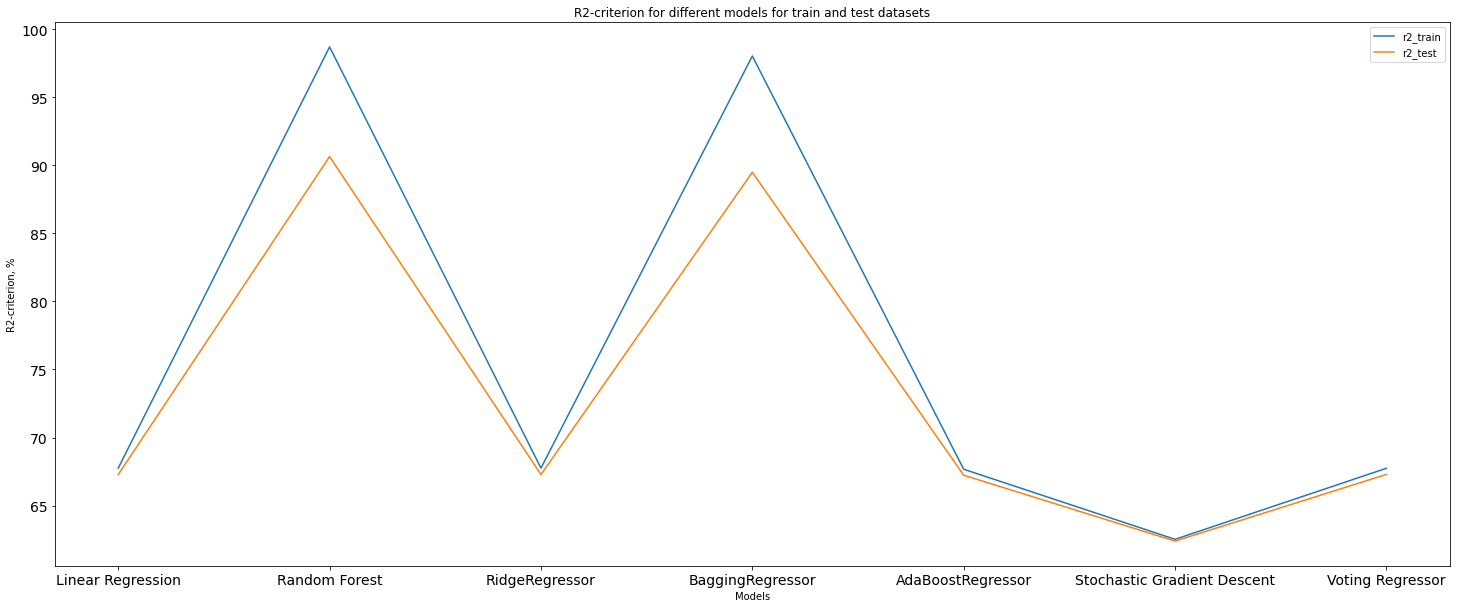

In [51]:
# Plot
plt.figure(figsize=[25,10])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['r2_train'], label = 'r2_train')
plt.plot(xx, df1_transposed['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx)
plt.show()

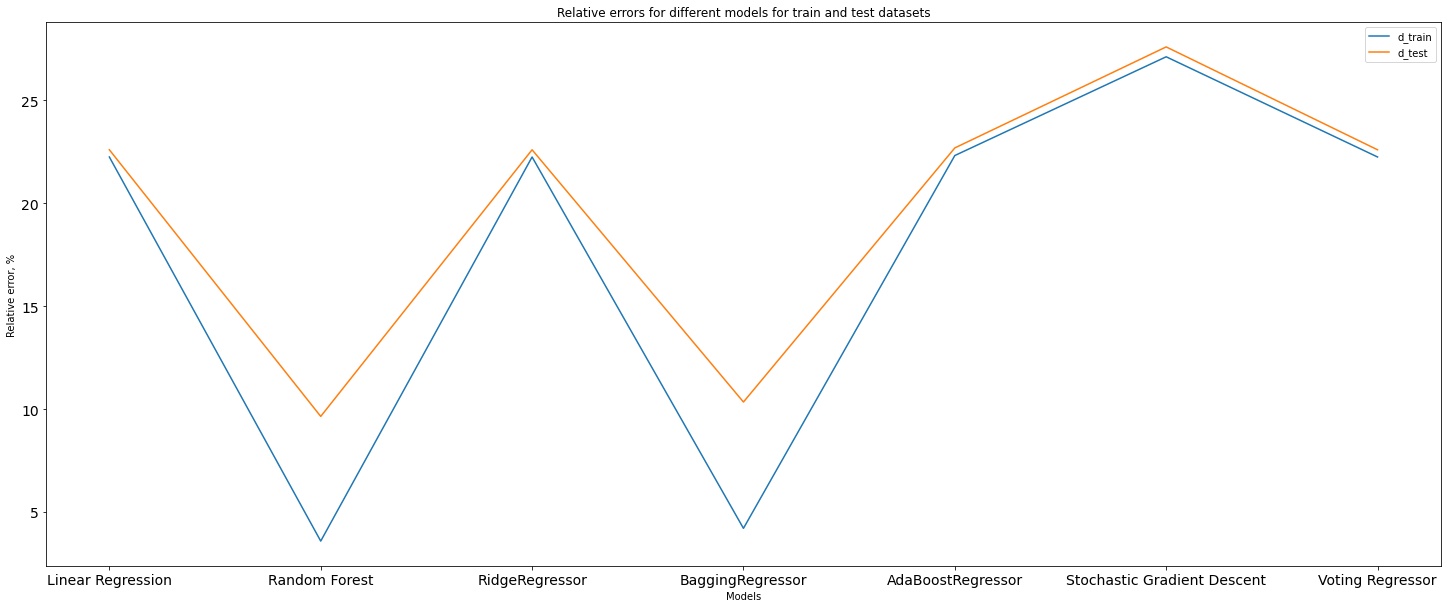

In [52]:
# Plot
plt.figure(figsize=[25,10])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['d_train'], label = 'd_train')
plt.plot(xx, df1_transposed['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx)
plt.show()

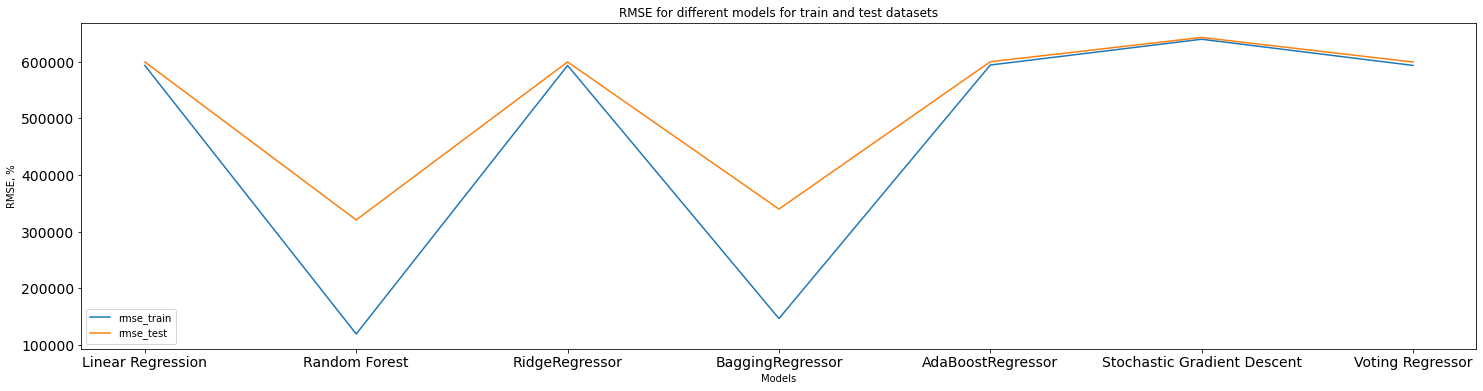

In [53]:
# Plot
plt.figure(figsize=[25,6])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['rmse_train'], label = 'rmse_train')
plt.plot(xx, df1_transposed['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx)
plt.show()